In [2]:
import numba as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Netflix.csv', lineterminator='\n')

In [6]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [12]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [14]:
df.duplicated().head()

,0
0,False
1,False
2,False
3,False
4,False


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


1.we have a dataframe consisting of 9827 rows and 9 columns.

2.our dataset looks a bit tidy with no NaNs nor duplicated values.

3.Release Date column needs to be casted into date time and to extract only the year value.

4.Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them.

5.there is noticable outliers in Popularity column

6.Vote Average bettter be categorised for proper analysis.

7.Genre column has comma saperated values and white spaces that needs to be handled and casted into category. Exploration Summary

In [19]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [20]:
df['Release_Date'] = df ['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [21]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the columns

In [22]:
cals=['overview','Original_Language','Poster_Url']

In [31]:
df.drop( cals , axis = 1, inplace = True, errors='ignore')
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Genre'],
      dtype='object')

In [32]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,Thriller
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Catigorizing

In [33]:
def catigorize_col(df , col,labels):
  edges = [ df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
  df[col] = pd.cut(df[col],edges,labels = labels , duplicates = 'drop')
  return df



In [35]:
labels = ['Not_popular','Below_avg','Avarage','Popular']
catigorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()


['Popular', 'Below_avg', 'Avarage', 'Not_popular', NaN]
Categories (4, object): ['Not_popular' < 'Below_avg' < 'Avarage' < 'Popular']

In [37]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,Popular,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,"In his second year of fighting crime, Batman u...",Popular,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,Popular,122,Below_avg,Thriller
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",Popular,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,As a collection of history's worst tyrants and...,Popular,1793,Avarage,"Action, Adventure, Thriller, War"


In [40]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
Not_popular,2467
Popular,2450
Avarage,2412
Below_avg,2398


In [44]:
df.dropna(inplace = True)
df.isna().sum()

,0
Release_Date,0
Title,0
Overview,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [45]:
df['Genre'] = df['Genre'] .str.split(',')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,Popular,8940,Popular,Action
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,Popular,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,Popular,8940,Popular,Science Fiction
3,2022,The Batman,"In his second year of fighting crime, Batman u...",Popular,1151,Popular,Crime
4,2022,The Batman,"In his second year of fighting crime, Batman u...",Popular,1151,Popular,Mystery


In [46]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [47]:
df.nunique()

,0
Release_Date,100
Title,9413
Overview,9720
Popularity,4
Vote_Count,3265
Vote_Average,4
Genre,38


In [50]:
sns.set_style('whitegrid')

In [51]:
df['Genre'].describe()

,Genre
count,25546
unique,38
top,Thriller
freq,1960


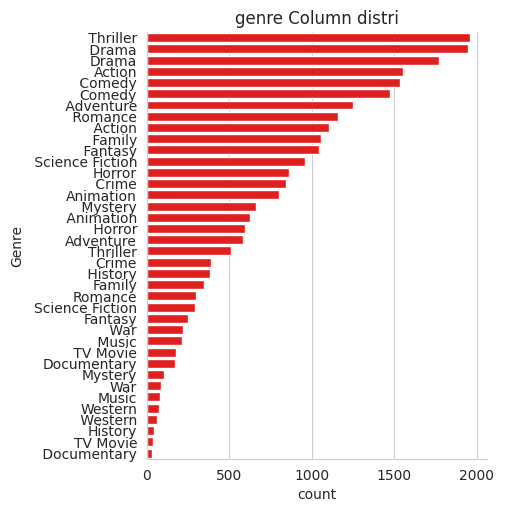

In [59]:
sns.catplot(y = 'Genre',data = df,kind = 'count',order = df['Genre'].value_counts().index,color = 'red') # Changed 'genre' to 'Genre'
plt.title('genre Column distri')
plt.show()

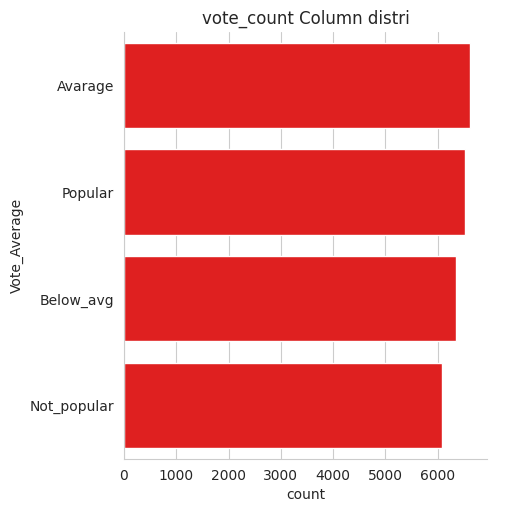

In [63]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color = 'red')
plt.title('vote_count Column distri')
plt.show()

In [65]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,Popular,8940,Popular,Action
1,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,Popular,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,Popular,8940,Popular,Science Fiction
3,2022,The Batman,"In his second year of fighting crime, Batman u...",Popular,1151,Popular,Crime
4,2022,The Batman,"In his second year of fighting crime, Batman u...",Popular,1151,Popular,Mystery
...,...,...,...,...,...,...,...
6735,2010,Killers,When an elite assassin marries a beautiful com...,Popular,1852,Not_popular,Comedy
6736,2010,Killers,When an elite assassin marries a beautiful com...,Popular,1852,Not_popular,Thriller
6737,2010,Killers,When an elite assassin marries a beautiful com...,Popular,1852,Not_popular,Romance
6738,1992,Bram Stoker's Dracula,When Dracula leaves the captive Jonathan Harke...,Popular,3899,Popular,Romance


In [66]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Genre
19552,2013,Third Person,An acclaimed novelist struggles to write an an...,Not_popular,499,Not_popular,Drama
19553,2013,Third Person,An acclaimed novelist struggles to write an an...,Not_popular,499,Not_popular,Romance
19554,2012,The Campaign,Two rival politicians compete to win an electi...,Not_popular,1397,Not_popular,Comedy
19555,2010,Barney's Version,The picaresque and touching story of the polit...,Not_popular,350,Avarage,Comedy
19556,2010,Barney's Version,The picaresque and touching story of the polit...,Not_popular,350,Avarage,Drama
...,...,...,...,...,...,...,...
25541,1973,Badlands,A dramatization of the Starkweather-Fugate kil...,Not_popular,896,Popular,Crime
25542,2020,Violent Delights,A female vampire falls in love with a man she ...,Not_popular,8,Not_popular,Horror
25543,2016,The Offering,When young and successful reporter Jamie finds...,Not_popular,94,Not_popular,Mystery
25544,2016,The Offering,When young and successful reporter Jamie finds...,Not_popular,94,Not_popular,Thriller


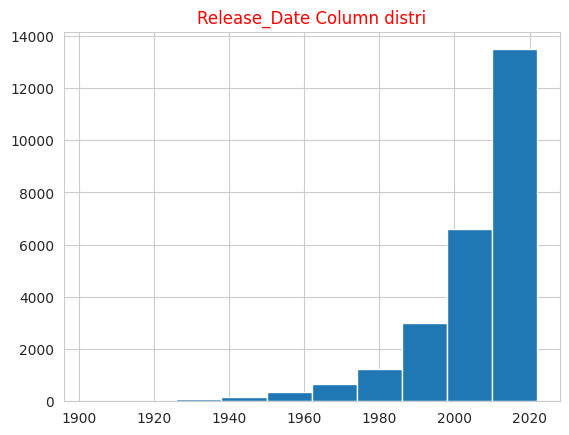

In [71]:
df['Release_Date'].hist()
plt.title('Release_Date Column distri',color='red')
plt.show()

Exploration Summary

we have a dataframe consisting of 9827 rows and 9 columns.

our dataset looks a bit tidy with no NaNs nor duplicated values.

Release Date column needs to be casted into date time and to extract only the year value.

Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them.

there is noticable outliers in Popularity column

Vote Average bettter be categorised for proper analysis.

Genre column has comma saperated values and white spaces that needs to be handled and casted into category. Exploration Summary